In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import yfinance as yf


In [2]:
# Download historical cryptocurrency data
data = yf.download('BTC-USD', start='2015-01-01', end='2022-12-31')
prices = data['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(prices.reshape(-1, 1))

# Create training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]

# Create training sequences
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

# Save the trained model
model.save('crypto_predictor.h5')


Epoch 1/10
72/72 [==============================] - 6s 29ms/step - loss: 0.0035
Epoch 2/10
72/72 [==============================] - 2s 29ms/step - loss: 5.3808e-04
Epoch 3/10
72/72 [==============================] - 2s 29ms/step - loss: 5.5669e-04
Epoch 4/10
72/72 [==============================] - 2s 34ms/step - loss: 4.5657e-04
Epoch 5/10
72/72 [==============================] - 2s 30ms/step - loss: 4.2675e-04
Epoch 6/10
72/72 [==============================] - 2s 29ms/step - loss: 3.6655e-04
Epoch 7/10
72/72 [==============================] - 2s 29ms/step - loss: 2.9043e-04
Epoch 8/10
72/72 [==============================] - 2s 31ms/step - loss: 3.1549e-04
Epoch 9/10
72/72 [==============================] - 2s 30ms/step - loss: 3.0275e-04
Epoch 10/10
72/72 [==============================] - 2s 29ms/step - loss: 2.5693e-04


In [4]:
# Prepare test sequences
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predict and reverse scaling
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


19/19 [==============================] - 1s 11ms/step


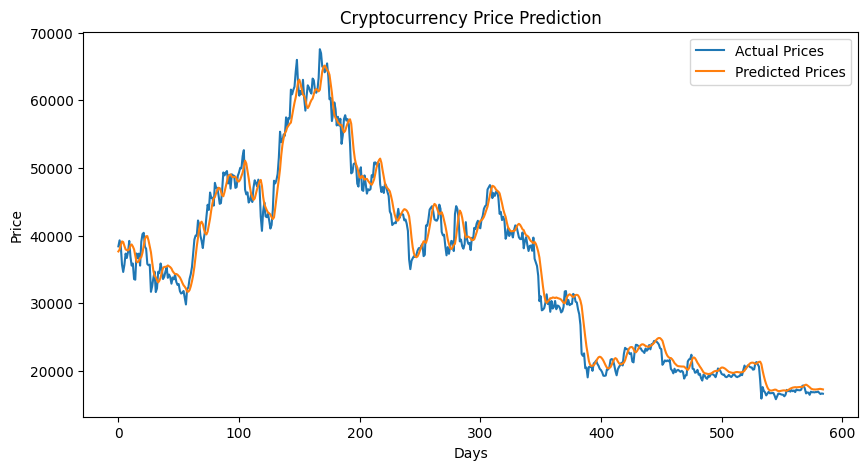

In [5]:
import matplotlib.pyplot as plt

# Plot predictions vs actual prices
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Cryptocurrency Price Prediction')
plt.show()


In [6]:
model.save("crypto_predictor.h5")